In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os
import random
import shutil

In [22]:
train_dir = r'D:\機器學習百日馬拉松\D101-D103：Kaggle期末考 考影像辨識\ml100-03-final\image_data\train'
validation_dir = r'D:\機器學習百日馬拉松\D101-D103：Kaggle期末考 考影像辨識\ml100-03-final\image_data\validation'
test_dir = r'D:\機器學習百日馬拉松\D101-D103：Kaggle期末考 考影像辨識\ml100-03-final\image_data\test'


train_dataset_daisy = r'D:\機器學習百日馬拉松\D101-D103：Kaggle期末考 考影像辨識\ml100-03-final\image_data\train\daisy' 
train_dataset_dandelion = r'D:\機器學習百日馬拉松\D101-D103：Kaggle期末考 考影像辨識\ml100-03-final\image_data\train\dandelion' 
train_dataset_rose = r'D:\機器學習百日馬拉松\D101-D103：Kaggle期末考 考影像辨識\ml100-03-final\image_data\train\rose' 
train_dataset_sunflower = r'D:\機器學習百日馬拉松\D101-D103：Kaggle期末考 考影像辨識\ml100-03-final\image_data\train\sunflower' 
train_dataset_tulip = r'D:\機器學習百日馬拉松\D101-D103：Kaggle期末考 考影像辨識\ml100-03-final\image_data\train\tulip' 

In [23]:
validation_dataset_daisy = os.path.join(validation_dir, 'daisy')
if not os.path.isdir(validation_dataset_daisy):
    os.mkdir(validation_dataset_daisy)
    
validation_dataset_dandelion = os.path.join(validation_dir, 'dandelion')
if not os.path.isdir(validation_dataset_dandelion):
    os.mkdir(validation_dataset_dandelion)
    
validation_dataset_rose = os.path.join(validation_dir, 'rose')
if not os.path.isdir(validation_dataset_rose):
    os.mkdir(validation_dataset_rose)
    
validation_dataset_sunflower = os.path.join(validation_dir, 'sunflower')
if not os.path.isdir(validation_dataset_sunflower):
    os.mkdir(validation_dataset_sunflower)

validation_dataset_tulip = os.path.join(validation_dir, 'tulip')
if not os.path.isdir(validation_dataset_tulip):
    os.mkdir(validation_dataset_tulip)

In [24]:
# fnames = [i for i in os.listdir(train_dataset_daisy)[:100]]
# for fname in fnames:
#     src = os.path.join(train_dataset_daisy, fname)
#     dst = os.path.join(validation_dataset_daisy, fname)
#     shutil.move(src, dst)        

In [25]:
# fnames = [i for i in os.listdir(train_dataset_dandelion)[:100]]
# for fname in fnames:
#     src = os.path.join(train_dataset_dandelion, fname)
#     dst = os.path.join(validation_dataset_dandelion, fname)
#     shutil.move(src, dst)

In [26]:
# fnames = [i for i in os.listdir(train_dataset_rose)[:100]]
# for fname in fnames:
#     src = os.path.join(train_dataset_rose, fname)
#     dst = os.path.join(validation_dataset_rose, fname)
#     shutil.move(src, dst)

In [27]:
# fnames = [i for i in os.listdir(train_dataset_sunflower)[:100]]
# for fname in fnames:
#     src = os.path.join(train_dataset_sunflower, fname)
#     dst = os.path.join(validation_dataset_sunflower, fname)
#     shutil.move(src, dst)

In [28]:
# fnames = [i for i in os.listdir(train_dataset_tulip)[:100]]
# for fname in fnames:
#     src = os.path.join(train_dataset_tulip, fname)
#     dst = os.path.join(validation_dataset_tulip, fname)
#     shutil.move(src, dst)

# 創建VGG16 model

In [29]:
import keras
from keras import models
from keras import layers
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))
conv_base.summary()

model = models.Sequential()
model.add(conv_base)                   
model.add(layers.Flatten())            
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))  
model.summary()  

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [31]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)  

train_generator = train_datagen.flow_from_directory(train_dir,  
                                                    target_size=(224, 224),  
                                                    batch_size=5,
                                                    class_mode='sparse')  

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(224, 224),
                                                        batch_size=5,
                                                        class_mode='sparse')

for cls, idx in train_generator.class_indices.items():
    print('Class #{} = {}'.format(idx, cls))

Found 2323 images belonging to 5 classes.
Found 500 images belonging to 5 classes.
Class #0 = daisy
Class #1 = dandelion
Class #2 = rose
Class #3 = sunflower
Class #4 = tulip


In [32]:
model.compile(optimizer=optimizers.Adam(lr=2e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

history = model.fit_generator(train_generator,
                              steps_per_epoch=80,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=20)

Epoch 1/30
80/80 [==============================] - 15s 185ms/step - loss: 1.3556 - acc: 0.4200 - val_loss: 1.2457 - val_acc: 0.5600
Epoch 2/30
80/80 [==============================] - 13s 163ms/step - loss: 0.9312 - acc: 0.6325 - val_loss: 0.7581 - val_acc: 0.7100
Epoch 3/30
80/80 [==============================] - 13s 162ms/step - loss: 0.7092 - acc: 0.7575 - val_loss: 0.4038 - val_acc: 0.8500
Epoch 4/30
80/80 [==============================] - 13s 162ms/step - loss: 0.6778 - acc: 0.7650 - val_loss: 0.4984 - val_acc: 0.8000
Epoch 5/30
80/80 [==============================] - 13s 162ms/step - loss: 0.6347 - acc: 0.7650 - val_loss: 0.5504 - val_acc: 0.7500
Epoch 6/30
80/80 [==============================] - 13s 162ms/step - loss: 0.6252 - acc: 0.7600 - val_loss: 0.7105 - val_acc: 0.7400
Epoch 7/30
80/80 [==============================] - 13s 163ms/step - loss: 0.5175 - acc: 0.8025 - val_loss: 0.4387 - val_acc: 0.8100
Epoch 8/30
80/80 [==============================] - 13s 163ms/step - 

In [33]:
results = model.evaluate_generator(validation_generator, steps=20)
print('Test loss:', results[0])
print('Test accuracy:', results[1])

Test loss: 0.2565889004035853
Test accuracy: 0.9000000059604645


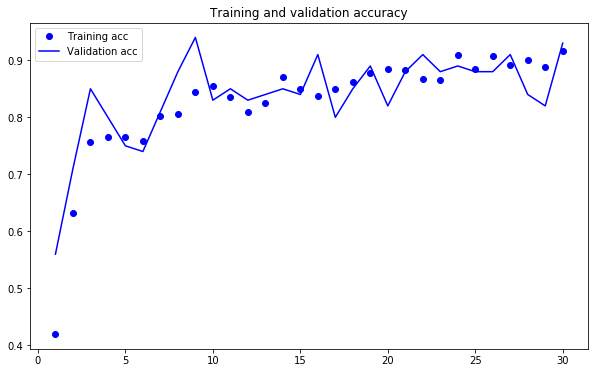

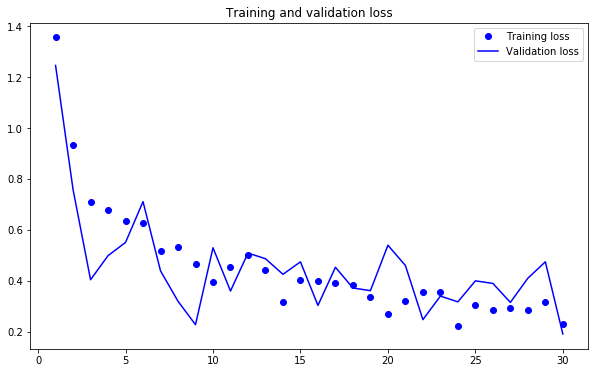

In [34]:
plt.rcParams['figure.figsize'] = (10, 6)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

### 凍結某些層

In [35]:
conv_base.trainable = True
set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [36]:
model.summary()
model.compile(optimizer=optimizers.Adam(lr=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])
callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_acc', patience=15),
                  keras.callbacks.ModelCheckpoint(filepath='VGG16.h5', monitor='val_loss', save_best_only=True)]

history = model.fit_generator(train_generator,
                              steps_per_epoch=80,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=20,
                              callbacks=callbacks_list)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 1285      
Total params: 28,774,021
Trainable params: 21,138,757
Non-trainable params: 7,635,264
_________________________________________________________________


C:\Users\henry\Anaconda3\envs\finlab\lib\site-packages\keras\engine\training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 1/100
80/80 [==============================] - 8s 99ms/step - loss: 0.1964 - acc: 0.9275 - val_loss: 0.1330 - val_acc: 0.9600
Epoch 2/100
80/80 [==============================] - 7s 83ms/step - loss: 0.1694 - acc: 0.9375 - val_loss: 0.3207 - val_acc: 0.9000
Epoch 3/100
80/80 [==============================] - 7s 82ms/step - loss: 0.2270 - acc: 0.9175 - val_loss: 0.2725 - val_acc: 0.8900
Epoch 4/100
80/80 [==============================] - 7s 84ms/step - loss: 0.1763 - acc: 0.9300 - val_loss: 0.3296 - val_acc: 0.9000
Epoch 5/100
80/80 [==============================] - 7s 85ms/step - loss: 0.1369 - acc: 0.9600 - val_loss: 0.1909 - val_acc: 0.9100
Epoch 6/100
80/80 [==============================] - 7s 84ms/step - loss: 0.1186 - acc: 0.9650 - val_loss: 0.2102 - val_acc: 0.9400
Epoch 7/100
80/80 [==============================] - 7s 82ms/step - loss: 0.1436 - acc: 0.9350 - val_loss: 0.4823 - val_acc: 0.9000
Epoch 8/100
80/80 [==============================] - 7s 82ms/step - loss: 0.

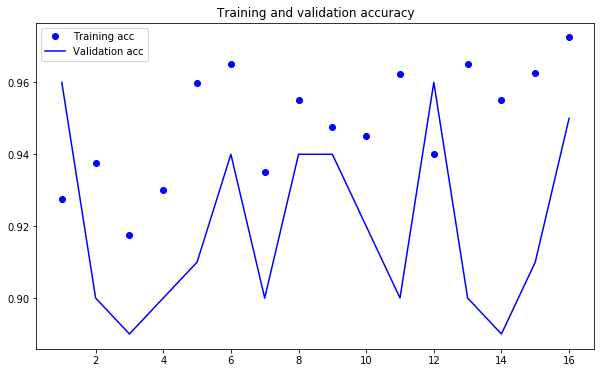

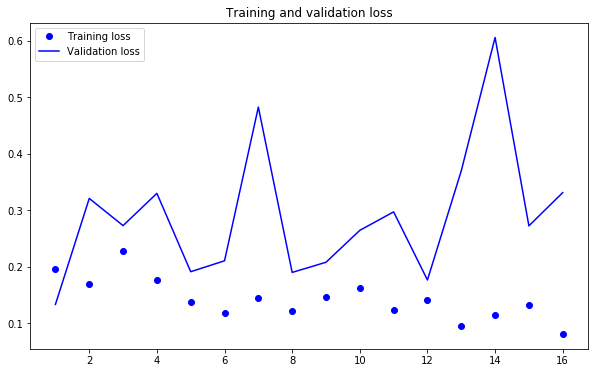

In [37]:
plt.rcParams['figure.figsize'] = (10, 6)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [38]:
model.load_weights("VGG16.h5")

In [39]:
results = model.evaluate_generator(validation_generator, steps=20)
print('Test loss:', results[0])
print('Test accuracy:', results[1])

Test loss: 0.1344749629544822
Test accuracy: 0.9400000020861625


In [43]:
from keras.preprocessing import image

out = np.array(['id', 'flower_class'])
testfiles = os.listdir(test_dir)
for testfile in testfiles:
    filename = testfile.split('.')[0]
    img = image.load_img(test_dir + '/' + testfile, target_size=(224, 224))
    if img is None:
        continue
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255.
    y_pred = model.predict(x)[0]
    tof = np.argmax(y_pred)
    out = np.vstack((out, [filename, tof]))

pd.DataFrame(out).to_csv('prediction.csv', index=False, header=False)